In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [57]:
#ノッチの幅
xi=0.1

#ノッチの深さ
d=0.1

fn=1000

#サンプリング周波数
T=1/8000


#中心周波数
wn=2*np.pi*fn

#プリワーピング
wn=(2/T)*np.tan(wn*T/2)




In [67]:
N2=1-(T*wn/2)*d*2*xi+(T*wn/2)**2
N1=2*(T*wn/2)**2-2
N0=1+(T*wn/2)*d*2*xi+(T*wn/2)**2
D2=1-(T*wn/2)*2*xi+(T*wn/2)**2
D1=2*(T*wn/2)**2-2
D0=1+(T*wn/2)*2*xi+(T*wn/2)**2

print("N2:"+str(N2))
print("N1:"+str(N1))
print("N0:"+str(N0))
print("D2:"+str(D2))
print("D1:"+str(D1))
print("D0:"+str(D0))


N2:1.163288604006348
N1:-1.6568542494923801
N0:1.179857146501272
D2:1.0887301627791908
D1:-1.6568542494923801
D0:1.2544155877284289


In [59]:
def analize(Omega):

  Omega=Omega*1000*2*np.pi
  z=np.exp(1j*Omega*T)
  Gz=(N2*z**(-2)+N1*z**(-1)+N0)/(D2*z**(-2)+D1*z**(-1)+D0)
  y=abs(Gz)

  return y

In [60]:
x=np.arange(0.1,4,0.1)
y=np.vectorize(analize)(x)
print(y*0.5)

[0.49990933 0.49961578 0.49904435 0.49802623 0.49618795 0.49262683
 0.48478315 0.46336163 0.38019505 0.05       0.36725965 0.45137986
 0.47554813 0.48534549 0.49026043 0.49308505 0.49486605 0.49606649
 0.49691707 0.49754347 0.49801904 0.49838903 0.49868265 0.49891947
 0.49911301 0.49927288 0.49940604 0.49951766 0.49961163 0.49969092
 0.49975781 0.4998141  0.49986119 0.49990016 0.49993189 0.49995703
 0.49997609 0.49998946 0.49999738]


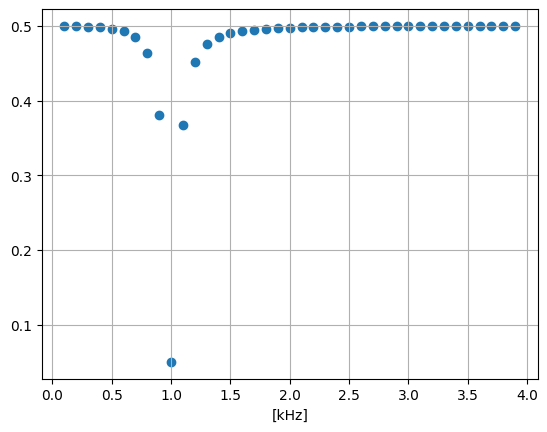

In [61]:
plt.scatter(x,y*0.5)
plt.grid()
plt.xlabel("[kHz]")
plt.show()

In [62]:
df=pd.DataFrame(y*0.5)

In [63]:
df.to_csv("notch.csv",header=None,index=None)